In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('pokemon.csv')

In [6]:
print('This is my data dictionary; 13 columns and the type of each column:')
df.info()

This is my data dictionary; 13 columns and the type of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [15]:
df.groupby('Type 1').count().sort_values('Name',ascending=False)

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Water,112,112,53,112,112,112,112,112,112,112,112,112
Normal,98,98,37,98,98,98,98,98,98,98,98,98
Grass,70,70,37,70,70,70,70,70,70,70,70,70
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Psychic,57,57,19,57,57,57,57,57,57,57,57,57
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Rock,44,44,35,44,44,44,44,44,44,44,44,44
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11562e5f8>,
      dtype=object)

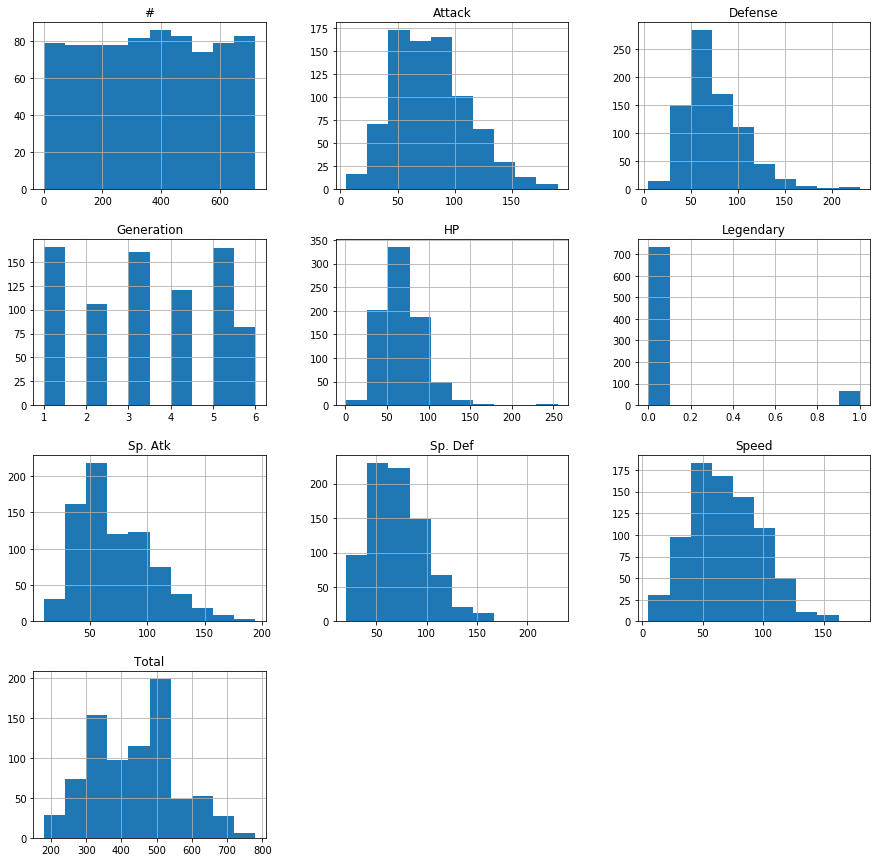

In [4]:
df.hist(figsize=(15,15))